WNIXALO | 20181020 | https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#three

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

Data simulating a sine-curve between 60°-300° with random noise:

In [32]:
# Define input array with angles from 60° to 300° in radians
x    = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(0) # setting rand seed for reproducibility
y    = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])

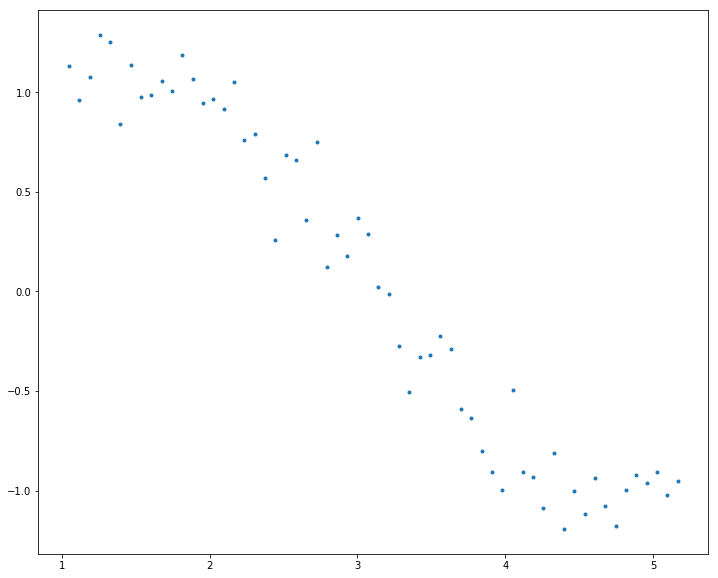

In [33]:
plt.plot(data['x'], data['y'], '.');

Adding a column for each power up to 15:

In [34]:
for i in range(2,16): # power of 1 is already there
    colname = f'x_{i}' # new var will be the x_power
    data[colname] = data['x']**i

In [35]:
data.head()
# print(data.head())

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.130633,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.958818,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.073995,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,1.287190,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.250429,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


Generic function for ridge regression, similar to that defined for simple linear regression:

In [36]:
# from: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#three
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # Fit the model
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        
    # Return result in pre-defined format
    rss = sum((y_pred - data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

Analyze result of ridge (L2) regression for 10 values of α:

In [37]:
# Initialize predictors to be set of 15 powers of x
predictors = ['x']
predictors.extend([f'x_{i}' for i in range(2,16)])

# Set different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Initialize dataframe for storing coefficients
col = ['rss','intercept'] + [f'coef_x_{i}' for i in range(1,16)]
ind = [f'alpha_{alpha_ridge[i]:.2g}' for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

/Users/WayNoxchi/Miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.468523e-17
  overwrite_a=True).T


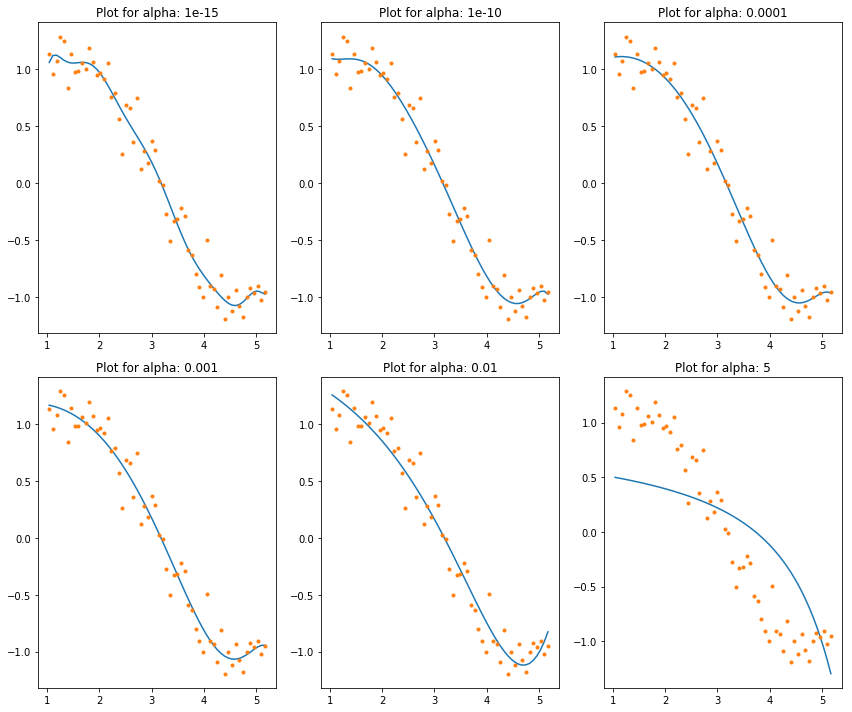

In [38]:
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, 
                                                  alpha_ridge[i], models_to_plot)